In [78]:
import pandas as pd

In [79]:
data = pd.read_excel('Lab2.xlsx', sheet_name = 'Sheet1')
voltage = data['Napięcie']
trackOne = data['tor1']
trackTwo = data['tor 2']

In [80]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

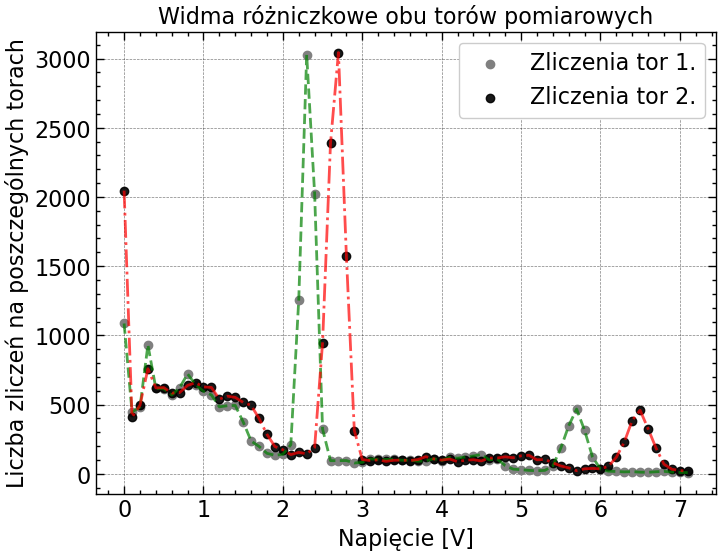

In [81]:
fig, ax = plt.subplots(1, 1)
ax.scatter(voltage, trackOne, color = 'gray', label = 'Zliczenia tor 1.')
ax.plot(voltage, trackOne, color = 'green', alpha = 0.7, linestyle = '--')

ax.scatter(voltage, trackTwo, color = 'black', alpha = 0.9, label = 'Zliczenia tor 2.')
ax.plot(voltage, trackTwo, color = 'red', alpha = 0.7, linestyle = '-.')

ax.set_title('Widma różniczkowe obu torów pomiarowych')
ax.set_xlabel('Napięcie [V]')
ax.set_ylabel('Liczba zliczeń na poszczególnych torach')

ax.legend()

In [82]:
data = pd.read_excel('Lab2.xlsx', sheet_name = 'Krzywa koincydencji')
delay = data['czas opóźnienia']
counting = data['liczba zliczeń']

In [83]:
import numpy as np
midValue = np.max(counting)/2

In [103]:
def gauss(t, A, x0, sigma): 
    return A * np.exp(-(t - x0) ** 2 / (2 * sigma ** 2))

In [119]:
from scipy.optimize import curve_fit
popt, _ = curve_fit(gauss, xdata=delay, ydata=counting, p0=[551, 2.7, 0.16])
popt

array([5.51684016e+02, 2.71138664e+00, 1.09111275e-01])

In [206]:
solHigher = popt[1] + np.sqrt(2 * np.power(popt[2], 2) * np.log(popt[0] / midValue))
solLower = popt[1] - np.sqrt(2 * np.power(popt[2], 2) * np.log(popt[0] / midValue))

FWHM = solHigher - solLower
round(FWHM/2,4)

0.1276

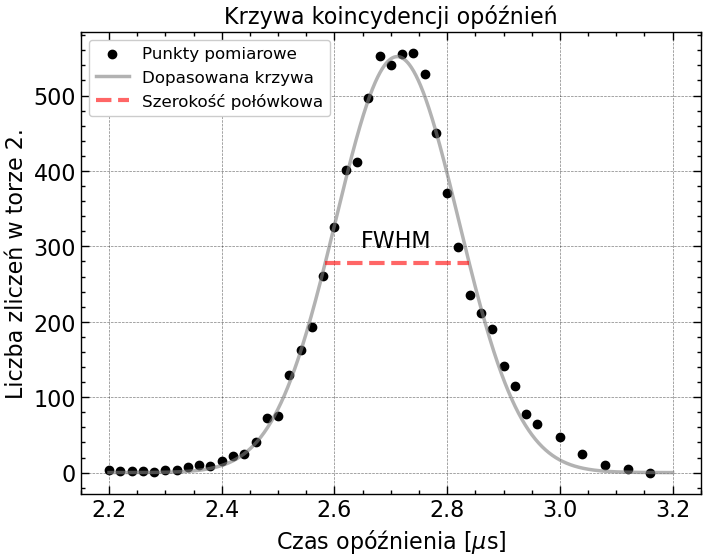

In [203]:
x = np.linspace(2.2, 3.2, 1000)

fig, ax = plt.subplots(1, 1)
ax.scatter(delay, counting, color = 'black', label = 'Punkty pomiarowe')
ax.plot(x, gauss(x, popt[0], popt[1], popt[2]), color = 'grey', linewidth = 2.5, alpha = 0.6, label = 'Dopasowana krzywa')
ax.plot([solLower, solHigher], [midValue, midValue], color='red', linestyle='--', alpha=0.6, linewidth = 3, label = 'Szerokość połówkowa')
ax.text(x = popt[1]-FWHM/4, y = midValue+20, s = 'FWHM', fontsize = 16)
ax.set_title('Krzywa koincydencji opóźnień')
ax.set_xlabel(r'Czas opóźnienia [$\mu$s]')
ax.set_ylabel('Liczba zliczeń w torze 2.')
ax.legend(loc = 'upper left', fontsize = 12 )